# 00 - Environment Setup

This is the notebook that sets up the GCP project for the other notebooks in this repository.  Based on the [`Readme.md`](https://github.com/statmike/vertex-ai-mlops/blob/main/readme.md), you already have this repository of notebooks pulled as a local resource in your Vertex AI Workbench based notebook instance.

### Video Walkthrough of this notebook:
Includes conversational walkthrough and more explanatory information than the notebook:
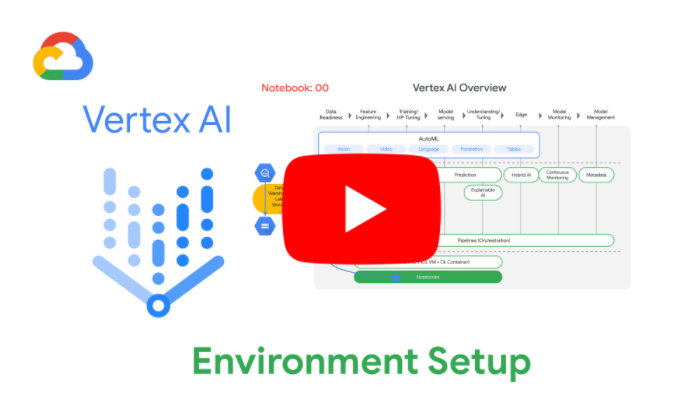

---
## Vertex AI - Conceptual Flow

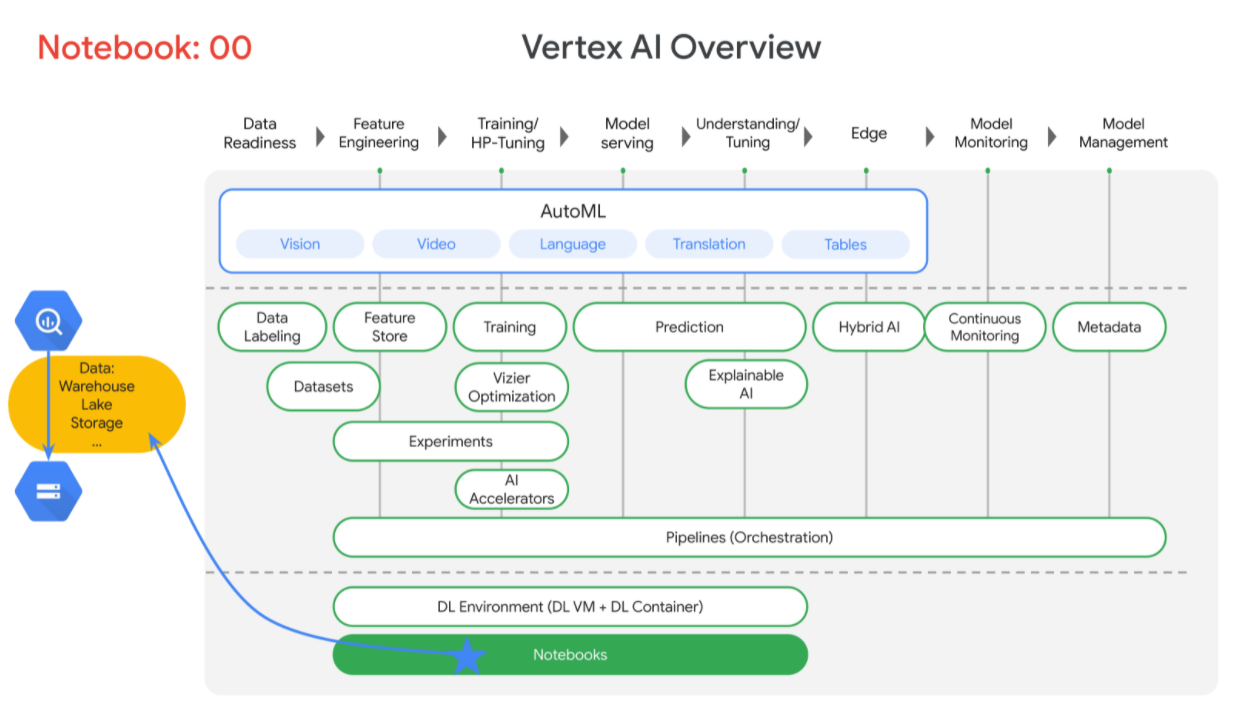

---
## Vertex AI - Workflow


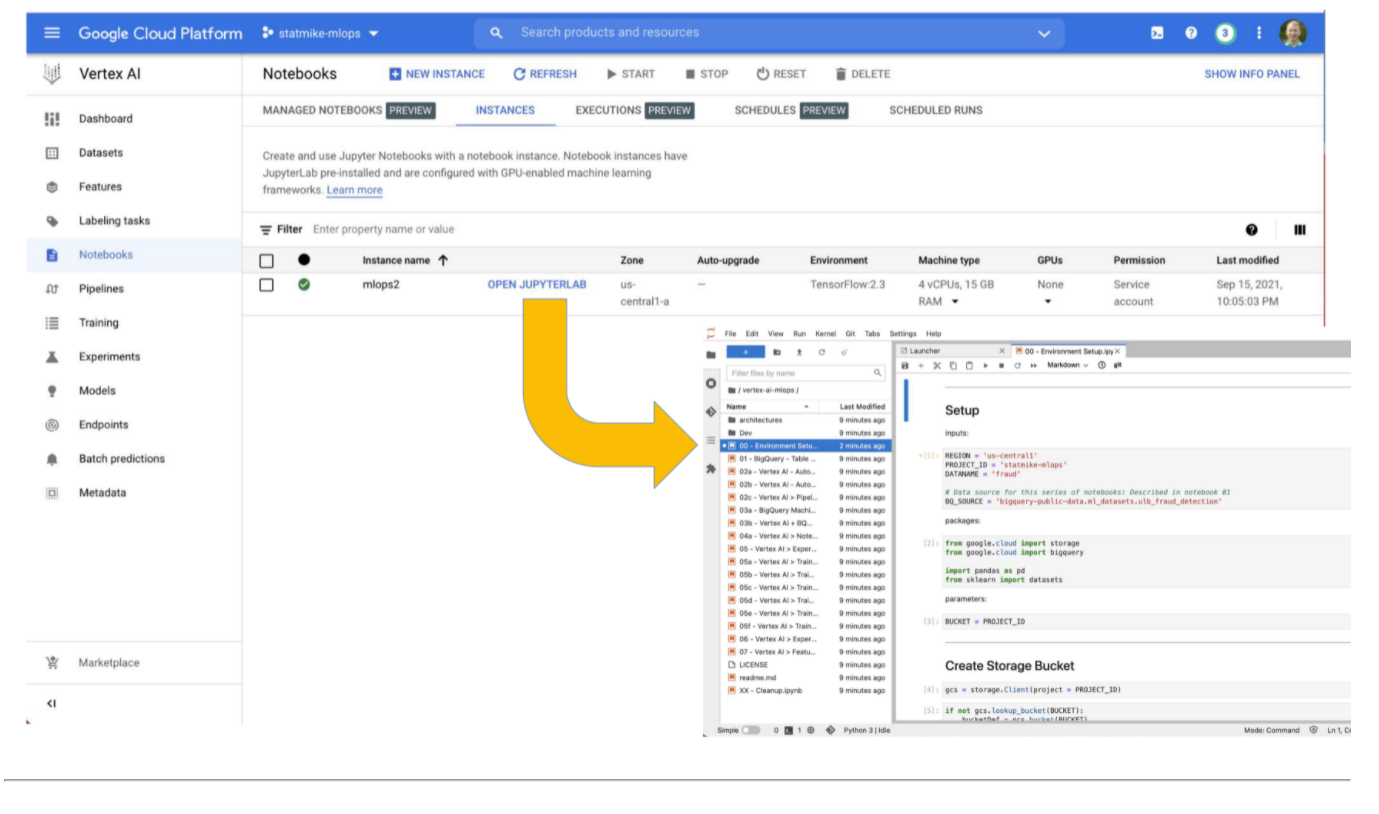

---
## Setup

inputs:

In [1]:
REGION = 'us-central1'
PROJECT_ID = 'ma-mx-presales-lab'
DATANAME = 'fraud'

# Data source for this series of notebooks: Described in notebook 01
BQ_SOURCE = 'bigquery-public-data.ml_datasets.ulb_fraud_detection'

**Note**
 
This repository is set to use a BQ_SOURCE table from the `bigquery-public-data` project.  More information on this project [here](https://cloud.google.com/bigquery/public-data)

packages:

In [2]:
from google.cloud import storage
from google.cloud import bigquery

import pandas as pd
from sklearn import datasets

parameters:

In [4]:
BUCKET = "vertex-ai-mlops-bucket"

---
## Create Storage Bucket

In [5]:
gcs = storage.Client(project = PROJECT_ID)

In [6]:
if not gcs.lookup_bucket(BUCKET):
    bucketDef = gcs.bucket(BUCKET)
    bucket = gcs.create_bucket(bucketDef, project=PROJECT_ID, location=REGION)
    print(bucket)
else:
    print(gcs.lookup_bucket(BUCKET))

<Bucket: vertex-ai-mlops-bucket>


---
## Store Project Data in the Storage Bucket
- export from bigquery table to GCS bucket as CSV
    - the table is referenced in the `BQ_SOURCE` variable at the top of this notebook
- https://cloud.google.com/bigquery/docs/exporting-data#python

In [7]:
bq = bigquery.Client(project = PROJECT_ID)

destination = f"gs://{BUCKET}/{DATANAME}/data/{DATANAME}.csv"

source = bigquery.TableReference.from_string(BQ_SOURCE)
extract = bq.extract_table(source, destination)

In [8]:
extract.result()

ExtractJob<project=ma-mx-presales-lab, location=US, id=24aaebc4-aac0-4099-8b3a-2ad8043cbf0b>

---
## Install KFP
If you get an error after a step, rerun it.  The dependecies sometimes resolve.

In [13]:
!pip install kfp -U -q

In [10]:
!pip install google-cloud-pipeline-components -U -q

---
## Other For Specific Notebooks

06 - Plotly used for visualizations

In [11]:
!pip install plotly -q

---
## Update AIPlatform Package:

The `google-cloud-aiplatform` package updates frequently.  Update it for latest functionality.
- Does this need to be run after KFP install below?

In [12]:
!pip install google-cloud-aiplatform -U -q